In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [13]:
import master_read as m
import efit_plots as e

In [18]:
import os
import sys

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [22]:
eqdsk_file = "/net/scratch3/chacon/pixie3d/EFIT/ITER/ITER3-chipar/3d/SN_fr_11_sh.geqdsk"

In [3]:
filepath = "/net/scratch3/chacon/pixie3d/EFIT/ITER/ITER3-chipar/3d/pixie3d-iter-SN-fr_11-chi_isotropic.scratch/"

In [20]:
def eqdsk_info():
    global a
    sys.stdout = open(os.devnull, 'w')
    m.read_geqdsk(eqdsk_file)
    m.struct_hor_ax_det()
    e.gridsNunits()
    e.intersections()
    sys.stdout = sys.__stdout__

In [23]:
eqdsk_info()

In [4]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 53
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Te', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J^1', 'J^2', 'J^3', 'JxRho', 'JxTe', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'pi+pe', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Rho_pert', 'Te_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


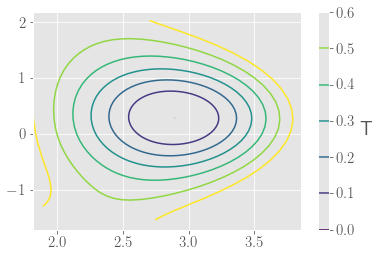

In [58]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,0,0])
cbar = plt.colorbar()
cbar.set_label("T",rotation=0,labelpad=12.2)
plt.show()

In [5]:
psi_pol = pxr.load_array(3,4,0,52)

In [6]:
Te = pxr.load_array(0,6,0,52)

In [26]:
r_sep = [x for x in m.DS.rbbbs]
z_sep = [x for x in m.DS.zbbbs]

Finding the location of the magnetic axis 

In [31]:
psi_pol_n0 = np.mean(psi_pol,axis=2)

In [33]:
MA = np.unravel_index(np.argmin(psi_pol_n0[:,:,0]),(psi_pol.shape[0],psi_pol.shape[1]))

In [36]:
Te_n0 = np.mean(Te,axis=2)

In [37]:
Tpeak = Te_n0[MA[0],MA[1],0]

In [40]:
Tnorm = 1/Tpeak

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


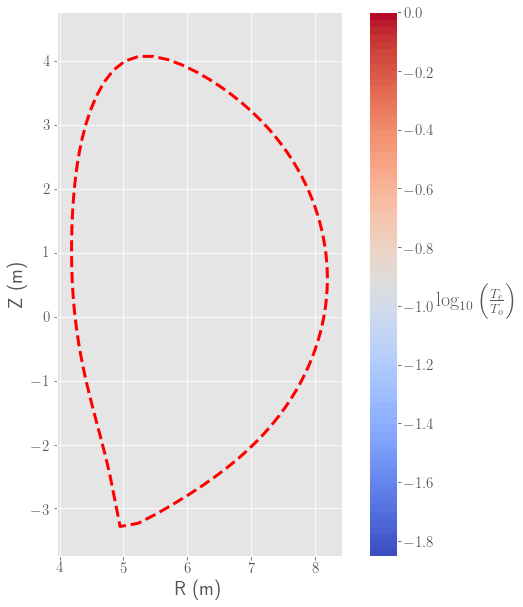

In [63]:
fig = plt.figure(figsize=(10,10))
plt.plot(r_sep,z_sep,color='red',linewidth=3,linestyle='--')
plt.axes().set_aspect("equal")
plt.xlabel("R (m)")
plt.ylabel("Z (m)")

ims = []
for i in range(52):
    im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,np.log10(Te[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    text = 't = '+str(i*10)
    an = plt.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        
    #################################################################
    ## Bug fix for Quad Contour set not having attribute 'set_visible'
    def setvisible(self,vis):
        for c in self.collections: c.set_visible(vis)
    def setanimated(self,ani):
        for c in self.collections: c.set_animated(ani)
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    im.axes = plt.gca()
    im.figure=fig
    ####################################################################
    
    ims.append(im.collections+[an])
cbar = plt.colorbar()
cbar.set_label(r"$\log_{10}\left(\frac{T_e}{T_o}\right)$",rotation=0,labelpad=42)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)

In [64]:
HTML(ani.to_html5_video())